In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [ ]:
x = np.array([[-40,0,0], [-10,0,0],  [0,0,0],  [8,0,0], [15,0,0], [22,0,0]],  dtype=float)
y = np.array([-40,  14, 32, 46, 59, 72],  dtype=float)

In [ ]:
x.shape

(6, 3)

In [ ]:
layer_1 = tf.keras.layers.Dense(units=2, input_shape=[3]) # vertical stack with one node
layer_2 = tf.keras.layers.Dense(units=1) # vertical stack with one node

In [ ]:
model = tf.keras.Sequential([layer_1, layer_2]) # horiz satack of layers

In [ ]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11 (44.00 Byte)
Trainable params: 11 (44.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
layer_1.get_weights()

[array([[ 0.78794384,  0.13883829],
        [-0.7772106 ,  0.46692038],
        [-0.3379373 ,  0.90306425]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [ ]:
layer_2.get_weights()

[array([[-1.3846754 ],
        [-0.38594818]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
history = model.fit(x, y, epochs=500, verbose=True)

Epoch 1/500
1/1 [==============================] - 5s 5s/step - loss: 4446.3384
Epoch 2/500
1/1 [==============================] - 0s 24ms/step - loss: 3863.4617
Epoch 3/500
1/1 [==============================] - 0s 18ms/step - loss: 3415.6155
Epoch 4/500
1/1 [==============================] - 0s 17ms/step - loss: 3063.2820
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 2766.5681
Epoch 6/500
1/1 [==============================] - 0s 17ms/step - loss: 2504.9756
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 2268.9756
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 2052.1101
Epoch 9/500
1/1 [==============================] - 0s 16ms/step - loss: 1849.3472
Epoch 10/500
1/1 [==============================] - 0s 17ms/step - loss: 1657.1830
Epoch 11/500
1/1 [==============================] - 0s 16ms/step - loss: 1474.0391
Epoch 12/500
1/1 [==============================] - 0s 17ms/step - loss: 1300.6761
Epoch 13/500
1/

In [ ]:
layer_1.get_weights()

[array([[-0.8262188 , -0.4296637 ],
        [-0.7772106 ,  0.46692038],
        [-0.3379373 ,  0.90306425]], dtype=float32),
 array([-4.378062, -8.247678], dtype=float32)]

In [ ]:
layer_2.get_weights()

[array([[-0.8133405],
        [-2.630595 ]], dtype=float32),
 array([6.7447376], dtype=float32)]

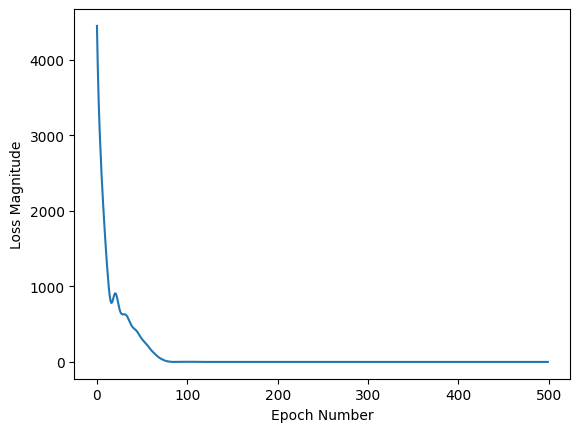

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
model.predict([[38,0,0]])

1/1 [==============================] - 1s 541ms/step


array([[100.48808]], dtype=float32)

In [ ]:
print("These are the layer variables: {}".format(layer_1.get_weights()))

These are the layer variables: [array([[-0.8262188 , -0.4296637 ],
       [-0.7772106 ,  0.46692038],
       [-0.3379373 ,  0.90306425]], dtype=float32), array([-4.378062, -8.247678], dtype=float32)]


In [ ]:
# variables
W = tf.Variable([0.3], dtype=tf.float32)
c = tf.Variable([-0.3], dtype=tf.float32)
linear_model = W * [1.2] + c

print(W)
print(c)
print(linear_model)



<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.3], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.3], dtype=float32)>
tf.Tensor([0.06], shape=(1,), dtype=float32)


## NN with More Layers

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')  # Assuming this is a regression task
])


model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 16        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(x, y, epochs=500, verbose=False)

In [ ]:
print(model.predict([[38.0,0,0]]))

1/1 [==============================] - 0s 67ms/step
[[100.97917]]


In [ ]:
print("Finished training the model")
print(model.predict([[38.0,57,88]]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([[38.0,57,88]])))

Finished training the model
1/1 [==============================] - 0s 32ms/step
[[-235.81885]]
1/1 [==============================] - 0s 32ms/step
Model predicts that 100 degrees Celsius is: [[-235.81885]] degrees Fahrenheit
